In [3]:
PATH = r'C:\\OReilly_Conference_2019\\'

nonGDPR = '_Other_EUGDPR'
GDPR = '_EUGDPR'

In [4]:
fileGDPR = open(PATH + GDPR , encoding = 'utf-8')
fileNonGDPR = open(PATH + nonGDPR , encoding = 'utf-8')

In [5]:
# Read lines from the files
gdprText = fileGDPR.readlines()
nongdprText = fileNonGDPR.readlines()

In [6]:
# Close the file pointers
fileGDPR.close()
fileNonGDPR.close()

In [7]:
#########################################################
##  Some standard processing for removing EOL & 
##  delete empty lines
#########################################################

def cleanText(textList):
    temp = []
    wordCount = 0
    for line in textList:
        line = line.rstrip()
        if len(line) >0:
            temp.append(line)
            wordCount += len(line.split())
    return wordCount, temp

In [8]:
gdprText = cleanText(gdprText)
nongdprText = cleanText(nongdprText)

In [9]:
print("Length of Privacy Notice (GDPR): %r lines & %r words " %(len(gdprText[1]), gdprText[0]) )
print("ie. {0:4.2f} words/lines".format(gdprText[0]/len(gdprText[1])) )

Length of Privacy Notice (GDPR): 92 lines & 2573 words 
ie. 27.97 words/lines


In [10]:
print("Length of Privacy Notice (Non-GDPR): %r lines & %r words " %(len(nongdprText[1]) , nongdprText[0]))
print("ie. {0:4.2f} words/lines".format(nongdprText[0]/len(nongdprText[1]))) 

Length of Privacy Notice (Non-GDPR): 34 lines & 1598 words 
ie. 47.00 words/lines


In [11]:
print("GDPR/non-GDPR privacy notice has {0:4.2f} times lines".format( len(gdprText[1])/len(nongdprText[1]) ))
print("GDPR/non-GDPR privacy notice has {0:4.2f} times words".format(gdprText[0]/nongdprText[0]))

GDPR/non-GDPR privacy notice has 2.71 times lines
GDPR/non-GDPR privacy notice has 1.61 times words


In [12]:
#########################################################
##  For pre-processing text. Returns text that can
##  be used for a wordCloud
#########################################################
import string
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

def stripText(textList):
    temp = []
    for sentence in textList:
        line = [i for i in sentence.lower().split() if i not in stop]
        line = ' '.join(line)
        line = line.translate(translator)
        line = line.replace('companyname', '')
        temp.append(line)
        
    return ' '.join(temp)

In [13]:
#########################################################
##  Creates a WordCloud
#########################################################

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#fontPath = 'C:\Windows\WinSxS\amd64_microsoft-windows-font-truetype-verdana_31bf3856ad364e35_10.0.17134.1_none_a3f9af7768584a2a'

def generate_wordcloud(textList, filename = 'wordCloud'):
    text = stripText(textList)
    wordcloud = WordCloud( relative_scaling =0.8, background_color="white").generate(text)
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    plt.title(filename)
    plt.show()
    plt.savefig(PATH + filename + '.png')
    plt.close()

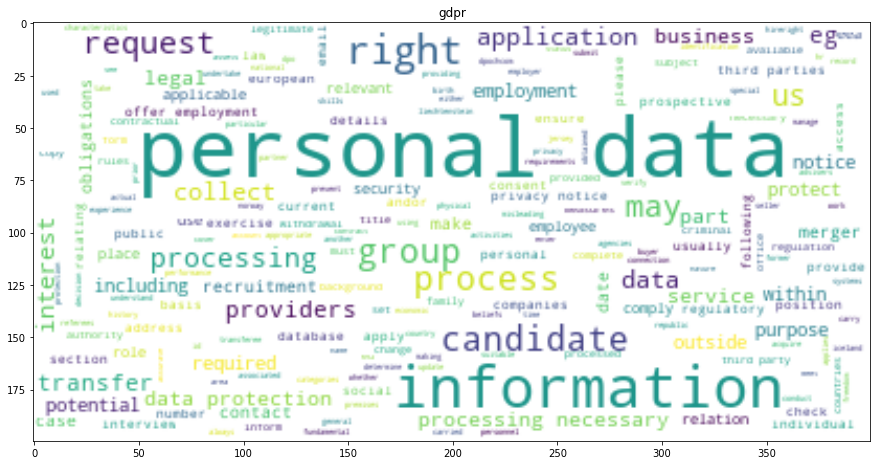

In [14]:
generate_wordcloud(gdprText[1], 'gdpr')

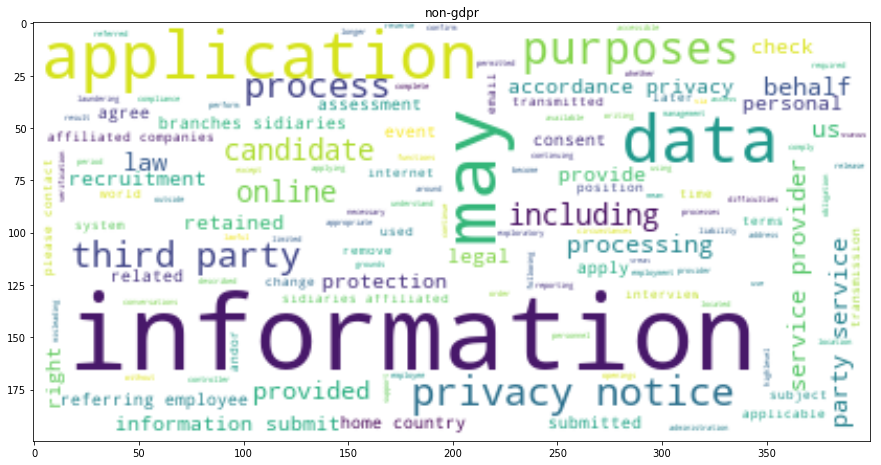

In [15]:
generate_wordcloud(nongdprText[1], 'non-gdpr')

In [16]:
from collections import Counter
NonGDPRcounts = Counter(stripText(nongdprText[1]).split())
#print(NonGDPRcounts)
GDPRcounts = Counter(stripText(gdprText[1]).split())
#print(GDPRcounts)

In [17]:
NonGDPRcounts.most_common(7)

[('information', 41),
 ('may', 23),
 ('data', 19),
 ('application', 19),
 ('privacy', 13),
 ('notice', 11),
 ('purposes', 11)]

In [18]:
GDPRcounts.most_common(7)

[('data', 61),
 ('personal', 47),
 ('information', 28),
 ('processing', 18),
 ('process', 14),
 ('group', 13),
 ('rights', 13)]

In [19]:
word = 'may'
print("GDPR count: %r Non-GDPR count: %r " %(GDPRcounts[word] , NonGDPRcounts[word] ))

GDPR count: 13 Non-GDPR count: 23 


In [20]:
#########################################################
##  print lines with specific words - onus is on the candidate while in GDPR it talks about responsible data handling
#########################################################

def printLine(word, textList):
    for line in textList:
        if word in line:
            print(line + '\n')


In [21]:
printLine('may', nongdprText[1])

You understand that in some locations, the Information you submit may not be subject to the same legal protection as is mandated in your home country and that the laws regarding privacy, data protection, and confidentiality of personal information may not be accorded the same protection as in your home country. UBS will, however, treat your Information in accordance with this Privacy Notice anywhere in the world that it is received.

For the avoidance of doubt, UBS processes Information as permitted by applicable law and may rely on any lawful grounds other than consent where the law permits it. Such lawful grounds may include but are not limited to processing of personal information to comply with a legal obligation, contractual necessity and/or legitimate interests

UBS operates through branches, subsidiaries and business groups around the world and your Information may be accessed by / shared with and retained by any of these UBS branches, subsidiaries, or affiliated companies for t

In [22]:
printLine('may', gdprText[1])

Information you submit as part of your application must be true, accurate, complete and not misleading. You understand that any false or misleading statements or omissions made by you during the application process, including your application and any assessments and interviews, may be sufficient cause to justify the rejection of your application or, if you have already become an employee, the immediate termination of your employment, subject to due process.

to benefit from cost-effective services (e.g. we may opt to use certain IT platforms offered by suppliers);

undertake recruitment activities, such as determining the suitability of a candidate’s qualifications, checking for any existing or potential conflicts of interest or any other restrictions which may otherwise restrict or prevent a candidate’s employment with UBS;

The personal data transferred within or outside the UBS Group as set out in sections 5.1 and 5.2, is in some cases also processed in a country outside the EEA, wh

In [23]:
printLine('risk', nongdprText[1])

UBS checks the data of a Candidate for risk and compliance reasons (e.g. to comply with anti-money laundering requirements). To this effect, UBS will perform a name check in a central database, where data from publicly available sources is provided primarily by third party service providers. Such public data supplied by external providers may also contain data on a person's racial and ethnic origin, political opinions, religious or philosophical convictions, and union membership. UBS uses only data which is related to the hiring and execution of the employment and/or which is necessary to do the required checks on money laundering, criminal activities, corruption, terrorist financing and similar compliance aspects. The checks are performed by specially authorized UBS staff or specialist third party background check providers selected by UBS. The data and results are only used for the aforementioned Purposes.



In [24]:
printLine('risk', gdprText[1])

We have also implemented adequate technical and organisational measures to protect personal data against unauthorised, accidental or unlawful destruction, loss, alteration, misuse, disclosure or access and against all other unlawful forms of processing. These security measures have been implemented taking into account the state of the art of the technology, their cost of implementation, the risks presented by the processing and the nature of the personal data, with particular care for sensitive data.



In [25]:
printLine('laundering', nongdprText[1])

UBS checks the data of a Candidate for risk and compliance reasons (e.g. to comply with anti-money laundering requirements). To this effect, UBS will perform a name check in a central database, where data from publicly available sources is provided primarily by third party service providers. Such public data supplied by external providers may also contain data on a person's racial and ethnic origin, political opinions, religious or philosophical convictions, and union membership. UBS uses only data which is related to the hiring and execution of the employment and/or which is necessary to do the required checks on money laundering, criminal activities, corruption, terrorist financing and similar compliance aspects. The checks are performed by specially authorized UBS staff or specialist third party background check providers selected by UBS. The data and results are only used for the aforementioned Purposes.



In [26]:
printLine('laundering', gdprText[1])

Financial information (e.g. summary credit history, bank account details, tax-related information, and information required to undertake required checks for money laundering, criminal activities, corruption, terrorist financing and related matters).



In [27]:
###################################################
## Average length of a sentence
## Longer length makes it difficult to clarify the legal terms
###################################################
import numpy as np
import pandas as pd

def statLength(textList, typeList = 'Temp'):
    sentenceLength = []
    print("Some stats for %s" %(typeList))
    for line in textList:
        sentenceLength.append(len(line.split()))
    
    print("Mean length of sentence : %r" %(np.round(np.mean(sentenceLength), 2)))
    print("Max length of sentence  : %r" %max(sentenceLength))
    print("Min length of sentence  : %r" %min(sentenceLength))
    print("Mode length of sentence : %r" %max(set(sentenceLength), key= sentenceLength.count))
    histSL = pd.Series(sentenceLength)
    plt.subplot(2,1,1)
    histSL.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
    plt.title('Sentence Length - Histogram')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    
    plt.subplot(2,1,2)
    histSL.plot()
    plt.title('Sentence Length - Trend')
    plt.xlabel('Sentence Position in Doc')
    plt.ylabel('Sentence Length')
    plt.grid(axis='y', alpha=0.75)
    
    plt.tight_layout()
    plt.show()
    
    return sentenceLength    
    #print("Average Length of each sentence %s: %r " %(typeList, ) sentenceLength/len(nongdprText[1]))


Some stats for Temp
Mean length of sentence : 27.97
Max length of sentence  : 134
Min length of sentence  : 3
Mode length of sentence : 11


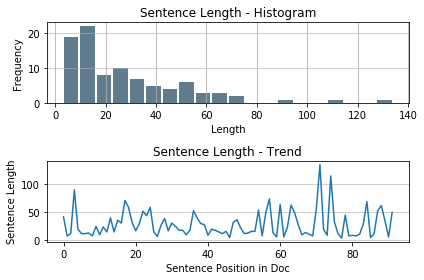

In [28]:
sentenceLength = statLength(gdprText[1])

Some stats for Temp
Mean length of sentence : 47.0
Max length of sentence  : 139
Min length of sentence  : 6
Mode length of sentence : 7


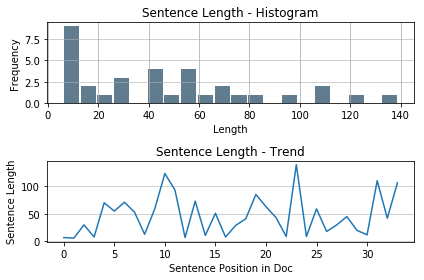

In [29]:
sentenceLength = statLength(nongdprText[1])

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [31]:
text = []
lemma = []
pos = []
tag = []
dep = []
shape = []
is_alpha = []
is_stop = []

ent_line = []
ent_text =[]
ent_start =[]
ent_stop =[]
ent_label =[]

for line in gdprText[1]:
    doc = nlp(line)
    
    for token in doc:
        text.append(token.text)
        lemma.append(token.lemma_)
        pos.append(token.pos_)
        tag.append(token.tag_)
        dep.append(token.dep_)
        shape.append(token.shape_)
        is_alpha.append(token.is_alpha)
        is_stop.append(token.is_stop)
        
    for ent in doc.ents:
        ent_line.append(line)
        ent_text.append(ent.text)
        ent_start.append(ent.start_char)
        ent_stop.append(ent.end_char)
        ent_label.append(ent.label_)

In [32]:
df_token = pd.DataFrame({'Text': text, 'Lemma': lemma, 'POS': pos, 
                         'Tag': tag, 'Dep': dep, 'Shape': shape, 'Is_Alpha': is_alpha, 'Is_Stop': is_stop})

In [33]:
df_ner = pd.DataFrame({'Line': ent_line, 'Text': ent_text, 'StartChar': ent_start, 
                       'EndChar': ent_stop, 'Label': ent_label})

In [34]:
df_token.head()

,Text,Lemma,POS,Tag,Dep,Shape,Is_Alpha,Is_Stop
0,This,this,DET,DT,nsubj,Xxxx,True,False
1,applies,apply,VERB,VBZ,ROOT,xxxx,True,False
2,to,to,ADP,IN,prep,xx,True,True
3,Austria,austria,PROPN,NNP,pobj,Xxxxx,True,False
4,",",",",PUNCT,",",punct,",",False,False


In [35]:
df_ner.head()

,Line,Text,StartChar,EndChar,Label
0,"This applies to Austria, Belgium, Bulgaria, Cr...",Austria,16,23,GPE
1,"This applies to Austria, Belgium, Bulgaria, Cr...",Belgium,25,32,GPE
2,"This applies to Austria, Belgium, Bulgaria, Cr...",Bulgaria,34,42,GPE
3,"This applies to Austria, Belgium, Bulgaria, Cr...",Croatia,44,51,GPE
4,"This applies to Austria, Belgium, Bulgaria, Cr...",Republic of Cyprus,53,71,GPE


In [36]:
df_token.to_excel(PATH+'spacy_token.xls')

In [37]:
df_ner.to_excel(PATH + 'spacy_ner.xls')

In [38]:
posCount = Counter(df_token['Dep'])

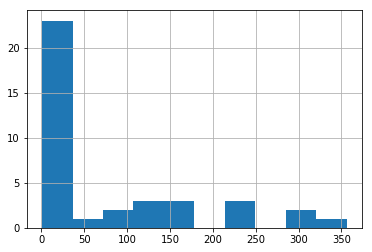

In [39]:
pd.Series(posCount).hist()

In [40]:
posCount

Counter({'nsubj': 128,
         'ROOT': 124,
         'prep': 316,
         'pobj': 317,
         'punct': 356,
         'conj': 227,
         'compound': 144,
         'cc': 151,
         'det': 214,
         'appos': 13,
         'poss': 82,
         'dobj': 143,
         'advmod': 81,
         'amod': 214,
         'intj': 9,
         'mark': 35,
         'advcl': 42,
         'pcomp': 18,
         'aux': 110,
         'acl': 31,
         'nmod': 4,
         'xcomp': 19,
         'nsubjpass': 19,
         'auxpass': 20,
         'relcl': 32,
         'attr': 6,
         'meta': 3,
         'nummod': 12,
         'acomp': 17,
         'neg': 12,
         'agent': 8,
         'ccomp': 18,
         'npadvmod': 5,
         'dative': 10,
         'prt': 8,
         'case': 6,
         'preconj': 1,
         'expl': 1})

In [41]:
doc.ents

(May 2018,)

In [42]:
line

'This notice was last updated in May 2018. It may be subject to amendments. Any future changes or additions to the processing of personal data as described in this notice affecting you will be communicated to you through an appropriate channel, depending on how we normally communicate with you.'

In [43]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

May 2018 32 40 DATE


In [44]:
for line in gdprText[1]:
    doc = nlp(line)
    for chunk in doc.noun_chunks:
        print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Austria Austria pobj to
Belgium Belgium conj Austria
Bulgaria Bulgaria conj Belgium
Croatia Croatia conj Bulgaria
Republic Republic conj Croatia
Cyprus Cyprus pobj of
Czech Republic Republic conj Republic
Denmark Denmark conj Republic
Estonia Estonia conj Denmark
Finland Finland conj Estonia
France France conj Finland
Germany Germany conj France
Greece Greece conj Germany
Hungary Hungary conj Greece
Iceland Iceland conj Hungary
Ireland Ireland conj Iceland
Italy Italy conj Ireland
Jersey Jersey conj Italy
Latvia Latvia conj Jersey
Liechtenstein Liechtenstein conj Latvia
Lithuania Lithuania conj Liechtenstein
Luxembourg Luxembourg conj Lithuania
Malta Malta conj Luxembourg
Monaco Monaco conj Malta
Netherlands Netherlands conj Monaco
Norway Norway conj Netherlands
Poland Poland conj Norway
Portugal Portugal conj Poland
Romania Romania conj Portugal
Slovakia Slovakia conj Romania
Slovenia Slovenia conj Slovakia
Spain Spain conj Slovenia
Sweden Sweden conj Spain
the UK UK conj Sweden
UBS C

database providers providers conj providers
consultants consultants conj providers
the recruitment agency agency pobj including
whom whom dobj apply
you you nsubj used
UBS UBS pobj to
third parties parties conj consultants
who who nsubj carry
pre-employment checks checks conj parties
prospective employees employees pobj on
HireRight HireRight pobj as
these service providers providers pobj of
contracts contracts dobj signed
your personal information information dobj protect
a potential buyer buyer ROOT buyer
connection connection pobj in
an actual or potential transfer transfer pobj with
merger merger conj transfer
part part pobj of
UBS’s business business pobj of
assets assets conj business
any associated rights rights conj transfer
interests interests conj rights
a business business dobj acquire
a merger merger pobj into
it it pobj with
any national and/or international regulatory, enforcement or exchange body body ROOT body
court court conj body
we we nsubjpass required
applicable la